In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

#Load Dataset

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/RNN dataset/tweets_train.csv')
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/RNN dataset/tweets_test.csv')
test_df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


#Selecting Required Columns

In [ ]:
data = data[['clean_text', 'is_retweet', 'Sentiment']]
data.head()

,clean_text,is_retweet,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,False,Neutral
1,TheSocialDilemma If we don t agree on what is ...,False,Positive
2,Watching TheSocialDilemma scary to see social ...,False,Negative
3,You check your social media before you pee in ...,False,Positive
4,watch thesocialdilemma and see what s actually...,False,Negative


In [ ]:
data.drop('is_retweet', axis=1, inplace=True)
test_df.drop('is_retweet', axis=1, inplace=True)

#Cleaning the Clean_text and store it in Cleaned_Text

In [ ]:
import re

def text(clean_text):
  if isinstance(clean_text, str):
    clean_text = clean_text.lower()
    clean_text = re.sub('\[.*?\]', '', clean_text)
    clean_text = re.sub('https?://\S+|www\.\S+', '', clean_text)
    clean_text = re.sub('\n', '', clean_text)
    clean_text = " ".join(filter(lambda x:x[0]!="@", clean_text.split()))
    return clean_text
  else:
    return clean_text

data['cleaned_text'] = data['clean_text'].apply(lambda x: text(x))

In [ ]:
def text(clean_text):
  if isinstance(clean_text, str):
    clean_text = clean_text.lower()
    clean_text = re.sub('\[.*?\]', '', clean_text)
    clean_text = re.sub('https?://\S+|www\.\S+', '', clean_text)
    clean_text = re.sub('\n', '', clean_text)
    clean_text = " ".join(filter(lambda x:x[0]!="@", clean_text.split()))
    return clean_text
  else:
    return clean_text

test_df['cleaned_text'] = test_df['clean_text'].apply(lambda x: text(x))

#Give Numbers to Sentiment Columns

In [ ]:
X = data['cleaned_text']
y = data['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

#Split data For Train And Test

In [ ]:
train_size = int(len(data) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print('Length of text: {} characters'.format(X_train.str.len().max()))  # Calculate length of string using str.len()
print("Max tweet length:", X_train.str.len().max())
print("Min tweet length:", X_train.str.len().min())
print("Average tweet length:", X_train.str.len().mean())

X_train shape: (5164,)
y_train shape: (5164,)
X_test shape: (1291,)
y_test shape: (1291,)
Length of text: 137.0 characters
Max tweet length: 137.0
Min tweet length: 1.0
Average tweet length: 89.67990699476846


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
# Check the type of each element in the X_train variable
data_types = X_train.apply(type)

# Convert any non-string elements to strings
X_train = X_train.apply(lambda x: str(x) if type(x) != str else x)

# Fit the tokenizer on the X_train variable
tokenizer.fit_on_texts(X_train)

In [ ]:
import pandas as pd

# Fit the tokenizer on the X_train variable, skipping any non-string elements
tokenizer.fit_on_texts([x for x in X_train if isinstance(x, str)])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert any non-string elements in X_test to strings
X_test = X_test.apply(lambda x: str(x) if type(x) != str else x)

# Fit the tokenizer on the X_train variable
tokenizer.fit_on_texts(X_train)

# Convert text to sequences for both X_train and X_test
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
maxlen = 140
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post', truncating='post')

# Print the shapes of the padded sequences
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)

Shape of X_train_padded: (5164, 140)
Shape of X_test_padded: (1291, 140)


#Apply RNN

In [ ]:
max_words = 10000  # Set the maximum number of words for the tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")  # Adding oov_token to handle out-of-vocabulary words

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(X_train)

# Convert text sequences to token sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
maxlen = 140
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post', truncating='post')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, GlobalAveragePooling1D  # Import GlobalAveragePooling1D

model = Sequential([
    Embedding(max_words, 64, input_length=maxlen),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    GlobalAveragePooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 140, 64)           8256      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 140, 32)           3104      
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                        

#Fit And Find Accuracy

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/15
33/33 [==============================] - 9s 153ms/step - loss: 1.0651 - accuracy: 0.4355 - val_loss: 1.0334 - val_accuracy: 0.4569
Epoch 2/15
33/33 [==============================] - 5s 159ms/step - loss: 0.9997 - accuracy: 0.4965 - val_loss: 0.9830 - val_accuracy: 0.6137
Epoch 3/15
33/33 [==============================] - 7s 213ms/step - loss: 0.8791 - accuracy: 0.6255 - val_loss: 0.8481 - val_accuracy: 0.6621
Epoch 4/15
33/33 [==============================] - 5s 137ms/step - loss: 0.6844 - accuracy: 0.7543 - val_loss: 0.7743 - val_accuracy: 0.6902
Epoch 5/15
33/33 [==============================] - 6s 180ms/step - loss: 0.5156 - accuracy: 0.8163 - val_loss: 0.7400 - val_accuracy: 0.6989
Epoch 6/15
33/33 [==============================] - 6s 177ms/step - loss: 0.3690 - accuracy: 0.8857 - val_loss: 0.7564 - val_accuracy: 0.7280
Epoch 7/15
33/33 [==============================] - 5s 145ms/step - loss: 0.2335 - accuracy: 0.9283 - val_loss: 2.0607 - val_accuracy: 0.7202
Epoch 

#Plot For Accuracy And Loss

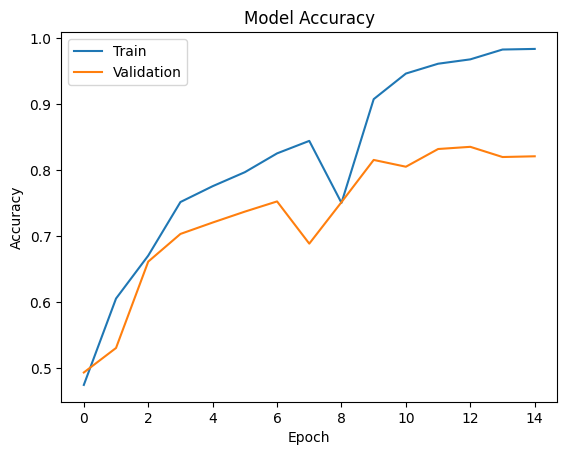

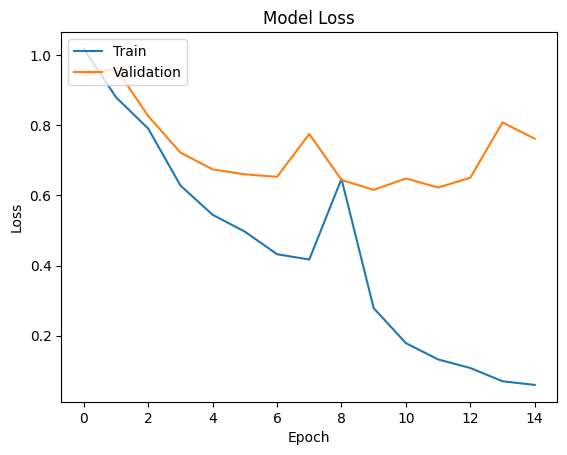

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Assuming test_df is your test dataset
test_df['clean_text'] = test_df['clean_text'].astype(str)
test_sequences = tokenizer.texts_to_sequences(test_df['clean_text'])

max_length = 140 # Ensure this matches the maxlen used during training
X_test = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Predict sentiment on the test data
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Map numerical labels back to original sentiment labels
inverse_sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
test_df['Sentiment'] = [inverse_sentiment_mapping[label] for label in y_test_pred_labels]

# Save the predictions
test_df[['user_name', 'Sentiment']].to_csv('test_predictions.csv', index=False)

print(test_df[['user_name', 'Sentiment']])


96/96 [==============================] - 2s 18ms/step
                      user_name Sentiment
0                     Doug Webb   Neutral
1                   Dan Reynish   Neutral
2                             🌤  Positive
3     “IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸   Neutral
4                   Mahima Sood  Positive
...                         ...       ...
3063                     𝘔𝘶𝘳𝘪;🦋   Neutral
3064              Didi Crawford   Neutral
3065               Ritwik Arora   Neutral
3066               Nishant Mody  Positive
3067       Quarantine James 🏁🇻🇨  Positive

[3068 rows x 2 columns]
